In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/mnist-in-csv/mnist_test.csv
/kaggle/input/mnist-in-csv/mnist_train.csv


## 1. What is Convolutional Neural Network?

Convolution matrix, or mask is a small matrix. It is used for blurring, sharpening, embossing, edge detection, and more.

Convolutiona layer 
takes an input volume
Applies a filter at every position of the input
Outputs another volume (usually of different size)

In [2]:
import cv2
import numpy as np
from scipy import misc
i = misc.ascent()

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

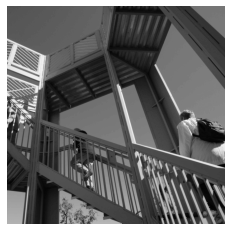

In [4]:

plt.grid(False)
plt.gray()
plt.axis('off')
plt.imshow(i)
plt.show()

The image is stored as a numpy array, so we can create the transformed image by just copying that array. Let's also get the dimensions of the image so we can loop over it later.

In [5]:
i_transformed = np.copy(i)
size_x = i_transformed.shape[0]
size_y = i_transformed.shape[1]
print(size_x)
print(size_y)

512
512


In [6]:
i_transformed.shape #Yhe image is 512*512 array

(512, 512)

In [7]:
i_transformed[1]

array([ 82,  82,  83,  83,  83,  83,  83,  82,  82,  82,  82,  82,  82,
        82,  82,  82,  82,  83,  83,  83,  83,  83,  83,  83,  83,  82,
        82,  82,  82,  82,  82,  82,  82,  85,  86,  85,  85,  86,  84,
        83,  85,  85,  85,  85,  85,  85,  85,  86,  85,  85,  85,  85,
        85,  85,  86,  86,  85,  85,  86,  84,  85,  86,  85,  86,  86,
        85,  86,  88,  87,  87,  87,  87,  87,  87,  87,  87,  87,  88,
        88,  87,  87,  87,  87,  87,  87,  87,  87,  87,  87,  87,  87,
        88,  88,  88,  89,  90,  90,  90,  90,  90,  90,  90,  91,  88,
        87,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,  90,
        90,  90,  90,  90,  89,  90,  90,  90,  90,  90,  90,  90,  91,
        92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,
        92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  92,  93,
        95,  95,  95,  93,  93,  95,  95,  95,  95,  95,  95,  95,  95,
        95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  95,  9

Now we can create a filter as a 3x3 array.

In [8]:
# This filter detects edges nicely
# It creates a convolution that only passes through sharp edges and straight
# lines.

#Experiment with different values for fun effects.
#filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]

# A couple more filters to try for fun!
filter = [ [-1, -2, -1], [0, 0, 0], [1, 2, 1]]
#filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]

# If all the digits in the filter don't add up to 0 or 1, you 
# should probably do a weight to get it to do so
# so, for example, if your weights are 1,1,1 1,2,1 1,1,1
# They add up to 10, so you would set a weight of .1 if you want to normalize them
weight  = 1

Now let's create a convolution. We will iterate over the image, leaving a 1 pixel margin, and multiply out each of the neighbors of the current pixel by the value defined in the filter.

i.e. the current pixel's neighbor above it and to the left will be multiplied by the top left item in the filter etc. etc. We'll then multiply the result by the weight, and then ensure the result is in the range 0-255

Finally we'll load the new value into the transformed image.

In [9]:
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

Now we can plot the image to see the effect of the convolution!

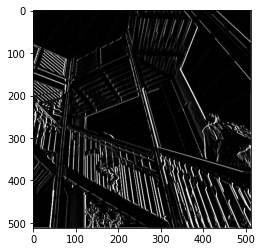

In [10]:
# Plot the image. Note the size of the axes -- they are 512 by 512
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show()   

Lets use another filter

In [11]:
filter = [ [0, 1, 0], [1, -4, 1], [0, 1, 0]]
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

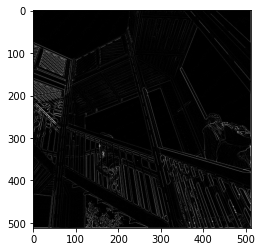

In [12]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show() 

Lets use another filter

In [13]:
filter = [ [-1, 0, 1], [-2, 0, 2], [-1, 0, 1]]
for x in range(1,size_x-1):
  for y in range(1,size_y-1):
      convolution = 0.0
      convolution = convolution + (i[x - 1, y-1] * filter[0][0])
      convolution = convolution + (i[x, y-1] * filter[0][1])
      convolution = convolution + (i[x + 1, y-1] * filter[0][2])
      convolution = convolution + (i[x-1, y] * filter[1][0])
      convolution = convolution + (i[x, y] * filter[1][1])
      convolution = convolution + (i[x+1, y] * filter[1][2])
      convolution = convolution + (i[x-1, y+1] * filter[2][0])
      convolution = convolution + (i[x, y+1] * filter[2][1])
      convolution = convolution + (i[x+1, y+1] * filter[2][2])
      convolution = convolution * weight
      if(convolution<0):
        convolution=0
      if(convolution>255):
        convolution=255
      i_transformed[x, y] = convolution

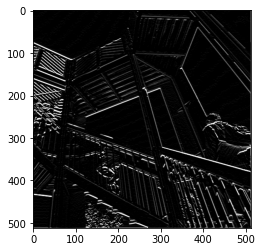

In [14]:
plt.gray()
plt.grid(False)
plt.imshow(i_transformed)
#plt.axis('off')
plt.show() 

<font color="blue">
Lets look at the effets of max pooling on the Image

This code will show a (2, 2) pooling. The idea here is to iterate over the image, and look at the pixel and it's immediate neighbors to the right, beneath, and right-beneath. Take the largest of them and load it into the new image. Thus the new image will be 1/4 the size of the old -- with the dimensions on X and Y being halved by this process. You'll see that the features get maintained despite this compression!

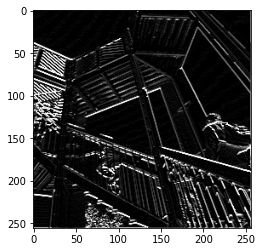

In [15]:
new_x = int(size_x/2)
new_y = int(size_y/2)
newImage = np.zeros((new_x, new_y))
for x in range(0, size_x, 2):
  for y in range(0, size_y, 2):
    pixels = []
    pixels.append(i_transformed[x, y])
    pixels.append(i_transformed[x+1, y])
    pixels.append(i_transformed[x, y+1])
    pixels.append(i_transformed[x+1, y+1])
    newImage[int(x/2),int(y/2)] = max(pixels)

# Plot the image. Note the size of the axes -- now 256 pixels instead of 512
plt.gray()
plt.grid(False)
plt.imshow(newImage)
#plt.axis('off')
plt.show()    

In [16]:
import keras
import tensorflow 
import matplotlib.pyplot as plt

In [17]:
fashion_mnist=keras.datasets.fashion_mnist

In [18]:
(train_images,train_labels),(test_images, test_labels)=fashion_mnist.load_data()


4423680/4422102 [==============================] - 0s 0us/step


In [19]:
train_images.shape

(60000, 28, 28)

In [20]:
train_labels.shape

(60000,)

In [21]:
test_images.shape

(10000, 28, 28)

In [22]:
test_labels.shape

(10000,)

In [23]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [24]:
train_images[0]

array([[  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   1,
          0,   0,  13,  73,   0,   0,   1,   4,   0,   0,   0,   0,   1,
          1,   0],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   3,
          0,  36, 136, 127,  62,  54,   0,   0,   0,   1,   3,   4,   0,
          0,   3],
       [  0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   0,   6,
          0, 102, 204, 176, 134, 144, 123,  23,   0,   0,   0,   0,  12,
         10,   0],
       [  

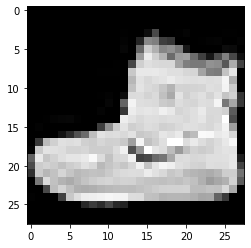

In [25]:
plt.imshow(train_images[0])

In [26]:
train_images[1]

array([[  0,   0,   0,   0,   0,   1,   0,   0,   0,   0,  41, 188, 103,
         54,  48,  43,  87, 168, 133,  16,   0,   0,   0,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   1,   0,   0,   0,  49, 136, 219, 216, 228, 236,
        255, 255, 255, 255, 217, 215, 254, 231, 160,  45,   0,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0,  14, 176, 222, 224, 212, 203, 198, 196,
        200, 215, 204, 202, 201, 201, 201, 209, 218, 224, 164,   0,   0,
          0,   0],
       [  0,   0,   0,   0,   0, 188, 219, 200, 198, 202, 198, 199, 199,
        201, 196, 198, 198, 200, 200, 200, 200, 201, 200, 225,  41,   0,
          0,   0],
       [  0,   0,   0,   0,  51, 219, 199, 203, 203, 212, 238, 248, 250,
        245, 249, 246, 247, 252, 248, 235, 207, 203, 203, 222, 140,   0,
          0,   0],
       [  0,   0,   0,   0, 116, 226, 206, 204, 207, 204, 101,  75,  47,
         73,  48,  50,  45,  51,  63, 113, 222, 202, 206, 220, 224,   0,
          0,   0],
       [  

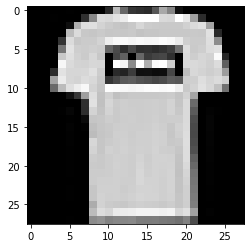

In [27]:
plt.imshow(train_images[1])

In [28]:
df=pd.DataFrame(train_labels)
df.nunique() # we have 10 unique labels 

0    10
dtype: int64

In [29]:
#Normalization of images before using algorithm
train_images= train_images.reshape(60000, 28, 28, 1)
train_images=train_images/255
train_images.shape

(60000, 28, 28, 1)

There's a bit of a change here in that the training data needed to be reshaped. That's because the first convolution expects a single tensor containing everything, so instead of 60,000 28x28x1 items in a list, we have a single 4D list that is 60,000x28x28x1, and the same for the test images. If you don't do this, you'll get an error when training as the Convolutions do not recognize the shape.

In [30]:
test_images= test_images.reshape(10000, 28, 28, 1)
test_images.shape

(10000, 28, 28, 1)

In [31]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense, Dropout, Flatten
from tensorflow.keras.layers import Conv2D, MaxPool2D

In [32]:
model= Sequential()

In [33]:
model.add(Conv2D(filters=62,kernel_size=3,activation="relu",input_shape=(28,28,1)))

In [34]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [35]:
model.add(Conv2D(filters=62,kernel_size=3,activation="relu"))

In [36]:
model.add(MaxPool2D(pool_size=2, strides=2))

In [37]:
model.add(Flatten(input_shape=(28,28)))

In [38]:
model.add(Dense(units=128, activation="relu"))


In [39]:
model.add(Dense(units=10, activation="softmax"))

In [40]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [41]:
model.summary() #This is the summary of our convolutional neural networks

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 62)        620       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 62)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 62)        34658     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 62)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1550)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               198528    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1

In [42]:
model.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.6211 - accuracy: 0.7741
Epoch 2/5
1875/1875 [==============================] - 50s 26ms/step - loss: 0.3104 - accuracy: 0.8846
Epoch 3/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2549 - accuracy: 0.9052
Epoch 4/5
1875/1875 [==============================] - 49s 26ms/step - loss: 0.2218 - accuracy: 0.9171
Epoch 5/5
1875/1875 [==============================] - 48s 26ms/step - loss: 0.1925 - accuracy: 0.9280


In [43]:
model.evaluate(test_images,test_labels)

313/313 [==============================] - 3s 8ms/step - loss: 49.6465 - accuracy: 0.8298


[49.646453857421875, 0.829800009727478]

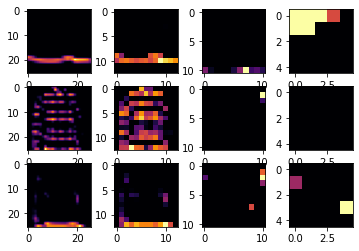

In [44]:
f, axarr = plt.subplots(3,4)
FIRST_IMAGE=0
SECOND_IMAGE=7
THIRD_IMAGE=26
CONVOLUTION_NUMBER = 1
from tensorflow.keras import models
layer_outputs = [layer.output for layer in model.layers]
activation_model = tensorflow.keras.models.Model(inputs = model.input, outputs = layer_outputs)
for x in range(0,4):
  f1 = activation_model.predict(test_images[FIRST_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[0,x].imshow(f1[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[0,x].grid(False)
  f2 = activation_model.predict(test_images[SECOND_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[1,x].imshow(f2[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[1,x].grid(False)
  f3 = activation_model.predict(test_images[THIRD_IMAGE].reshape(1, 28, 28, 1))[x]
  axarr[2,x].imshow(f3[0, : , :, CONVOLUTION_NUMBER], cmap='inferno')
  axarr[2,x].grid(False)

In [45]:
classifications = model.predict(test_images)
classifications[0]

array([0., 0., 0., 0., 0., 0., 0., 0., 0., 1.], dtype=float32)

# we train a new model with fewer convolutional layer

In [46]:
model2= Sequential()
model2.add(Conv2D(filters=64,kernel_size=3,activation="relu",input_shape=(28,28,1)))
model2.add(MaxPool2D(2,2))
model2.add(Flatten())
model2.add(Dense(units=128, activation="relu"))
model2.add(Dense(units=10, activation="softmax"))

                

In [47]:
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_2 (Conv2D)            (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 10816)             0         
_________________________________________________________________
dense_2 (Dense)              (None, 128)               1384576   
_________________________________________________________________
dense_3 (Dense)              (None, 10)                1290      
Total params: 1,386,506
Trainable params: 1,386,506
Non-trainable params: 0
_________________________________________________________________


In [48]:
model2.compile(optimizer="adam",loss="sparse_categorical_crossentropy", metrics=["accuracy"]) 

In [49]:
model2.fit(train_images,train_labels,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 33s 18ms/step - loss: 0.4926 - accuracy: 0.8260
Epoch 2/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2535 - accuracy: 0.9070
Epoch 3/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.2049 - accuracy: 0.9238
Epoch 4/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1712 - accuracy: 0.9365
Epoch 5/5
1875/1875 [==============================] - 32s 17ms/step - loss: 0.1375 - accuracy: 0.9483


In [50]:
val=0
count=0
for i in classifications[0]:
    if i > val:
        val = i
        count += 1
     
        print(count)
    

1


In [51]:
print(test_labels[0])

9


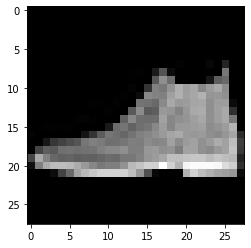

In [52]:
plt.imshow(test_images[0])

In [53]:
test=pd.read_csv("../input/mnist-in-csv/mnist_test.csv")
test

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,7,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9995,2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9997,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
9998,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [54]:
train= pd.read_csv("../input/mnist-in-csv/mnist_train.csv")
train

,label,1x1,1x2,1x3,1x4,1x5,1x6,1x7,1x8,1x9,...,28x19,28x20,28x21,28x22,28x23,28x24,28x25,28x26,28x27,28x28
0,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,9,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
59995,8,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59996,3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59997,5,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
59998,6,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test, y_test) = mnist.load_data()

NameError: name 'tf' is not defined

In [56]:
x_train.shape

NameError: name 'x_train' is not defined

In [57]:
y_train.shape

NameError: name 'y_train' is not defined

In [58]:
x_train= x_train/255
x_train

NameError: name 'x_train' is not defined

In [59]:
x_test=x_test/255

NameError: name 'x_test' is not defined

In [60]:
np.unique(y_train)

NameError: name 'y_train' is not defined

In [61]:
x_test[0]

NameError: name 'x_test' is not defined

In [62]:
plt.imshow(x_test[0])

NameError: name 'x_test' is not defined

In [63]:
from tensorflow.keras import Sequential

In [64]:
model=Sequential()

In [65]:
from tensorflow.keras.layers import Dense, Flatten

In [66]:
model.add(Flatten())

In [67]:
model.add(Dense(units=128, activation="relu"))

In [68]:
model.add(Dense(units=10,activation="softmax"))

In [69]:
from tensorflow.keras.callbacks import EarlyStopping

In [70]:
callback=EarlyStopping(monitor="val_loss", patience=5)

In [71]:
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])

In [72]:
history=model.fit(x_train,y_train,validation_data=(x_test,y_test),callbacks=[callback],epochs=20)

NameError: name 'x_train' is not defined

In [73]:
model.summary()

ValueError: This model has not yet been built. Build the model first by calling `build()` or calling `fit()` with some data, or specify an `input_shape` argument in the first layer(s) for automatic build.

In [74]:
model.evaluate(x_test,y_test)

NameError: name 'x_test' is not defined

In [75]:
df=pd.DataFrame(model.history.history)
df

AttributeError: 'NoneType' object has no attribute 'history'

<AxesSubplot:>

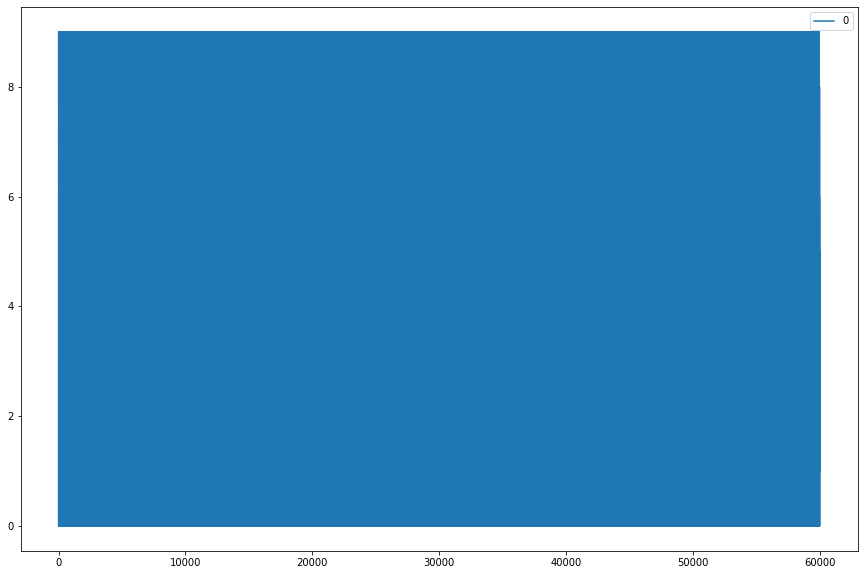

In [76]:
df.plot(figsize=(15,10))

In [77]:
predictions=model.predict(x_test)
predictions

NameError: name 'x_test' is not defined

In [78]:
y_test

NameError: name 'y_test' is not defined

In [79]:
predictions_df=pd.DataFrame(predictions)
predictions_df.head()

NameError: name 'predictions' is not defined

In [80]:
from scipy.special import softmax

probabilities = softmax(predictions, axis=1)
probabilities

NameError: name 'predictions' is not defined

In [81]:
predictions_df=pd.DataFrame(probabilities)
predictions_df.head()

NameError: name 'probabilities' is not defined

In [82]:
predictions_df[0]

NameError: name 'predictions_df' is not defined

In [83]:
x_test[0].shape

NameError: name 'x_test' is not defined

In [84]:
y_test[0]

NameError: name 'y_test' is not defined

In [85]:
model.predict(x_test)

NameError: name 'x_test' is not defined

In [86]:
plt.imshow(x_test[0])

NameError: name 'x_test' is not defined

In [87]:
predictions[0]

NameError: name 'predictions' is not defined